# Kompaneets Model


The Kompaneets model assumes that the energy source is located at z = 0 in an exponential atmospehere. The model assumes that tge internal pressure of the bubble dominates any external pressure. 

In [24]:
# import necessary modules/libraries
import numpy as np
import scipy.integrate as integrate
import scipy.special as special 
import math as m

In [25]:
# define constants
gamma = 5./3.

#set initial values for the bubble from spherical similarity solution
t0 = 3.38e-2
y0 = 0.102
#omega = 4.189e-3
omega = 4.444e-3
eth = 1.536e-2

#set initial stpes
t = t0
y = y0

# set step size
dy = 0.0001

#set stop condition
## HC- check stop condition with SB
yfinal = 1.99

#p_init = 4./3.*np.pi*y**3
p_init = (gamma-1.)*eth/omega
print(p_init)

2.3042304230423043


In [26]:
# define function to solve for radius as a function of z and y

def radius(z,y):
    radius = 2*np.arccos(0.5*np.exp(0.5*z)*(1-0.25*y**2 + np.exp(-z)))
    return radius

In [27]:
# define fucntion to solve for volume as a function of y

def volume(y):
    #find end points of integration
    z1 = -2*m.log(1-0.5*y)
    z2 = -2*m.log(1+0.5*y)
    step_num = 100
    # integrate over all cross sections
    #for i in range(0, step_num):
    dz = (z1-z2)/(step_num)
    #print(dz)
        #return dz
    volume = 0.
    n = step_num
    for n in range(1, step_num):
        zn = z2 + (2*n-1)*(0.5*dz)
        volume  = volume + (radius(zn, y))**2
    volume = volume*np.pi*dz
    return volume
   
    

In [28]:
# open csv file to write/append results to
import csv
headers = ['y' , 't' , 'omega', 'eth', 'pressure'] # set column headers
initial_vals = [y0, t0, omega, eth, p_init]
with open('komp_results.csv', 'a') as f:
    writer = csv.writer(f)
    writer.writerow(headers)
    writer.writerow(initial_vals)
        
#y,t,y0,t0,dy,dt,omega,omeganew,eth,ethnew,pressure

In [29]:
## create arrays

eth_results = []
pressure_res = []
t_res = []

In [30]:
while (y <= yfinal):
    # find dt using dy and constants
    dt = dy /m.sqrt(0.5*(gamma**2-1.)*eth/omega)

    # in the case of a radiative shell, use the following expression
    # dt = dy/ sqrt((gamma-1)*eth/omega)

    # update y and t values
    y = y+dy
    t = t+dt

    # update voume
    omega_new = volume(y)

    # get new energy from old pressure
    pressure = (gamma-1.)*eth/omega
    eth_new = eth + dt - pressure*(omega_new-omega)
    
    # put result values in a list
    up_vals = [y, t, omega_new, eth_new, pressure]
    with open('komp_results_v2.csv', 'a') as f:
        writer = csv.writer(f)
        writer.writerow(up_vals)
        
    # updated old values to new values
    eth = eth_new
    omega = omega_new
    
    eth_results.append(eth)
    pressure_res.append(pressure)
    t_res.append(t)
#end loop when end criteria is met

Text(0.5, 1.0, 'E-thermal')

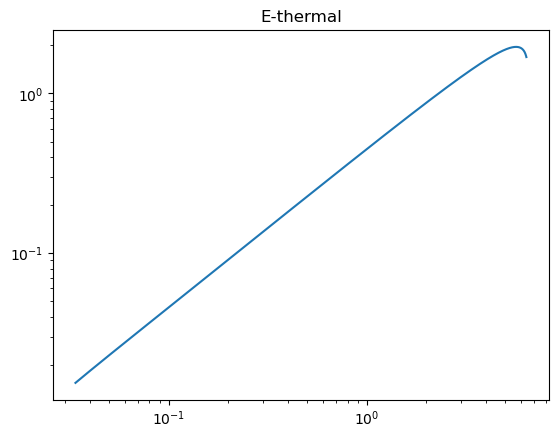

In [31]:
import matplotlib.pyplot as plt

plt.plot(t_res, eth_results)
plt.xscale('log')
plt.yscale('log')
plt.title("E-thermal")

Text(0.5, 1.0, 'Pressure')

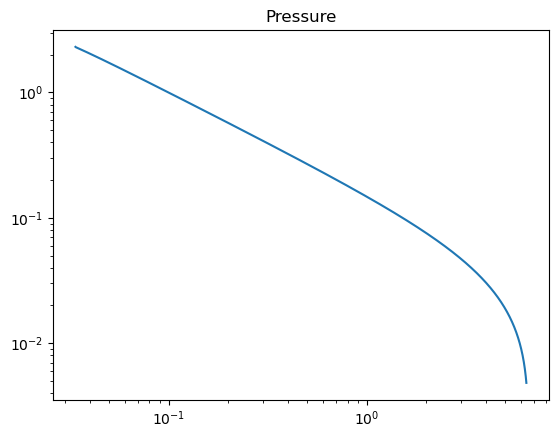

In [33]:
plt.plot(t_res, pressure_res)
plt.xscale('log')
plt.yscale('log')
plt.title("Pressure")